**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Ciencia de Datos en Python**

**Sección U**

**Proyecto Final**

### Importando librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams.update({'figure.max_open_warning': 0})

### Importando datos del proyecto

In [2]:
#Importando los datos del archivo binario de Numpy
data = np.load("proyecto_training_data.npy")

#Realizando una copia del slicing de los datos originales
training = np.copy(data[:int(len(data)*0.8)])
validation = np.copy(data[-int(len(data)*0.2):])

### Análisis exploratorio de datos

In [3]:
#Creando un data frame para los datos de entrenamiento con los nombres de las columnas utilizando pandas
columns = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df_training = pd.DataFrame(training, columns=columns)
#Creando un data frame con los datos de validacion con los nombres de las columnas utilizando pandas
df_validation = pd.DataFrame(training, columns=columns)

#Aplicando la función describe sobre df_training, para mostrar la media, desviación estandar, valor minimo y valor maximo
df_training.describe(percentiles=[])

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [4]:
# Encontrando el rango de las variables
print("Rango de SalePrice: \t", np.ptp(df_training["SalePrice"]))
print("Rango de OverallQual: \t", np.ptp(df_training["OverallQual"]))
print("Rango de 1stFlrSF: \t", np.ptp(df_training["1stFlrSF"])) 
print("Rango de TotRmsAbvGrd: \t", np.ptp(df_training["TotRmsAbvGrd"]))
print("Rango de YearBuilt: \t", np.ptp(df_training["YearBuilt"]))
print("Rango de LotFrontage: \t", np.ptp(df_training["LotFrontage"].dropna()))

Rango de SalePrice: 	 720100.0
Rango de OverallQual: 	 9.0
Rango de 1stFlrSF: 	 2894.0
Rango de TotRmsAbvGrd: 	 12.0
Rango de YearBuilt: 	 135.0
Rango de LotFrontage: 	 292.0


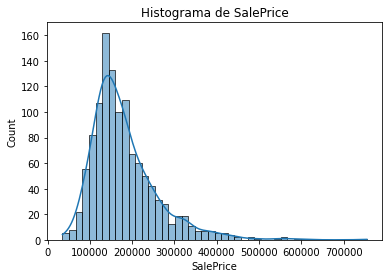

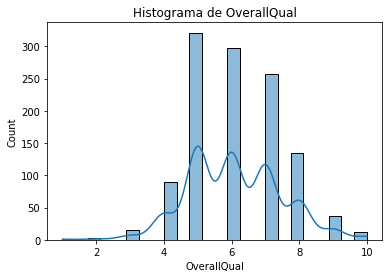

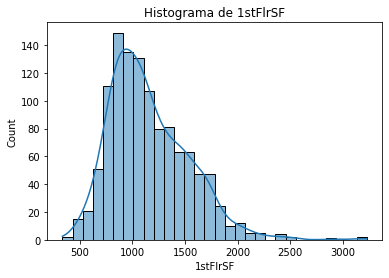

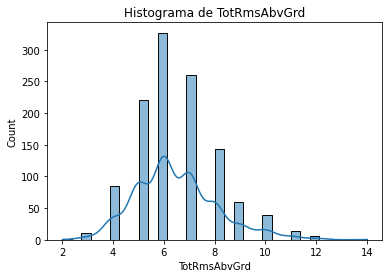

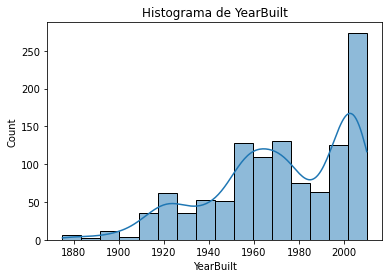

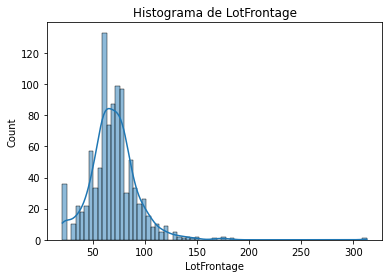

In [5]:
# Ciclo para imprimir los histogramas de cada variable
for x in df_training.columns:
    plt.figure()
    # Se utiliza histplot en lugar de la función distplot debido a que ya esta marcada como deprecated
    sns.histplot(df_training[x],  kde=True).set_title("Histograma de "+ x)

In [6]:
# Calculo de la correlación para 2 variables (SalePrice y OverallQual)
corr_SalePrice_OverallQual = np.corrcoef(df_training['SalePrice'], df_training['OverallQual'])[0,1]
# Se imprime el resultado
corr_SalePrice_OverallQual

0.7939900504626407

In [7]:
# Calculo de la correlación para todas las variables
correlation = df_training.corr()
correlation

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsAbvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


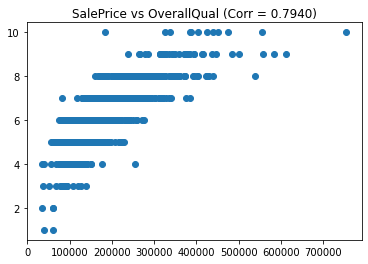

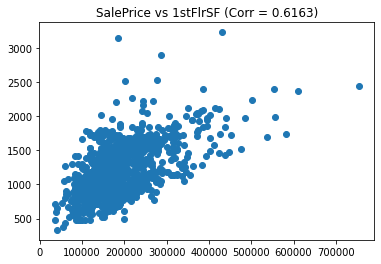

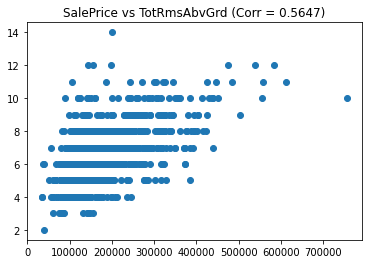

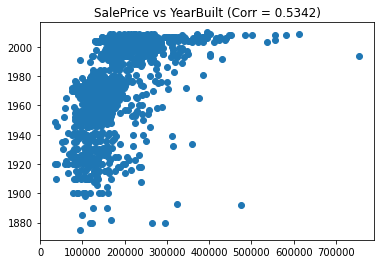

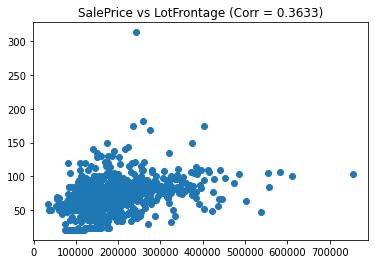

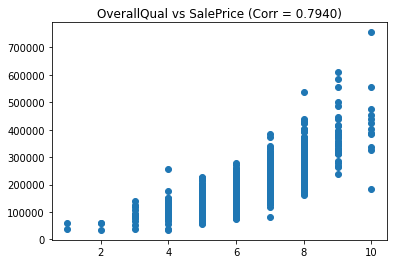

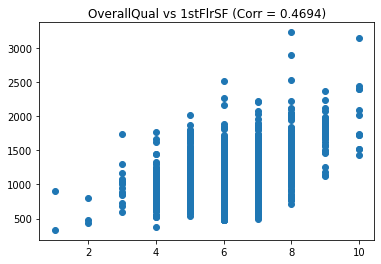

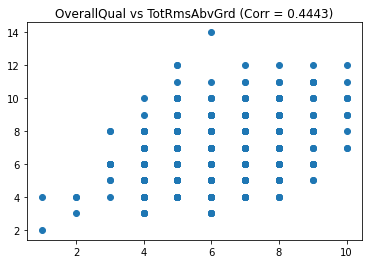

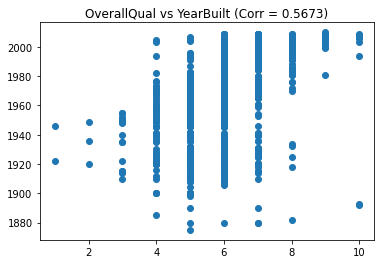

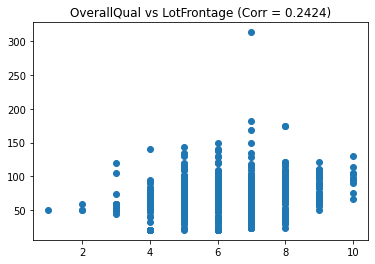

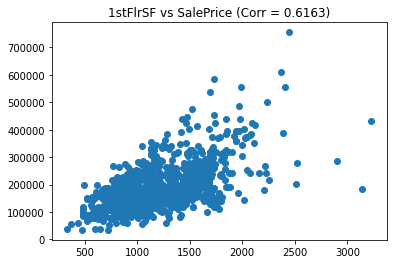

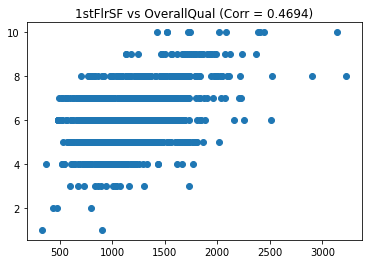

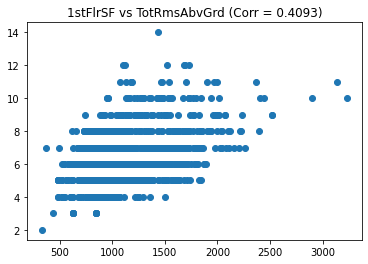

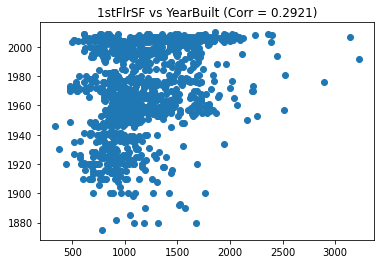

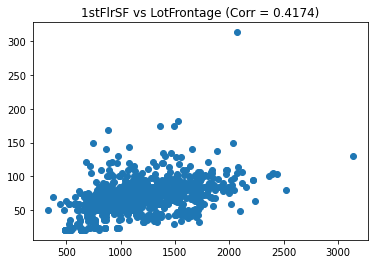

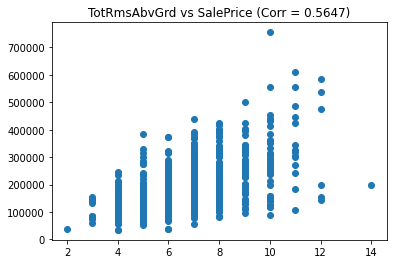

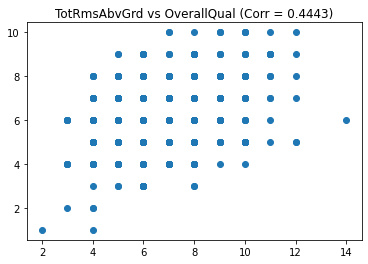

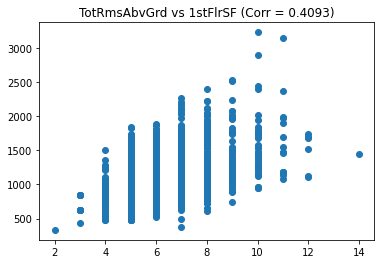

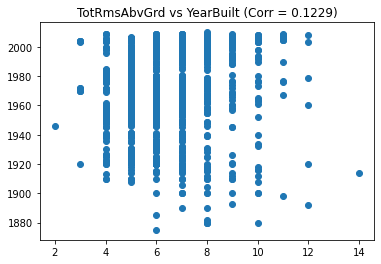

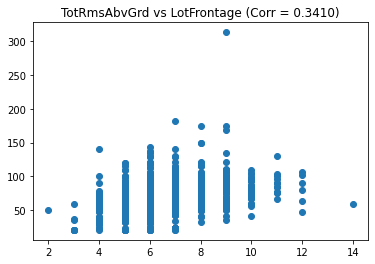

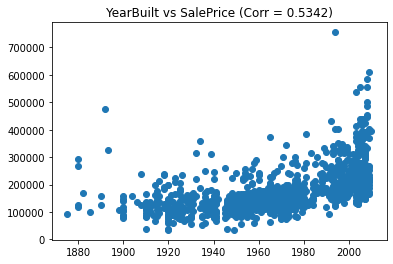

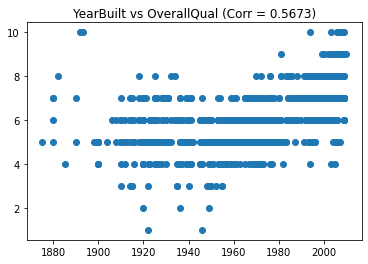

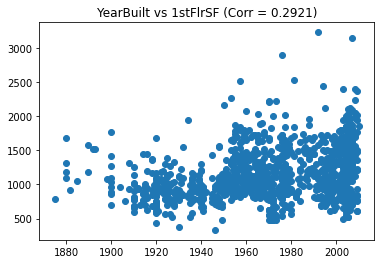

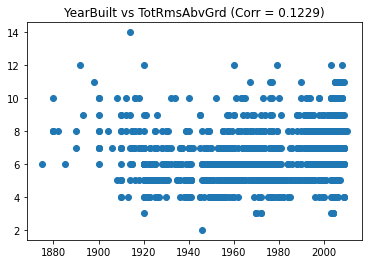

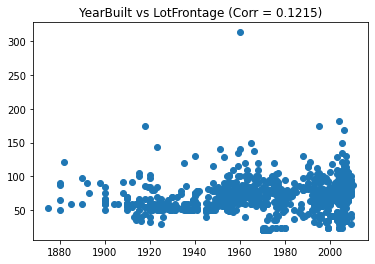

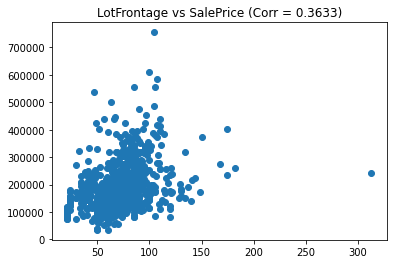

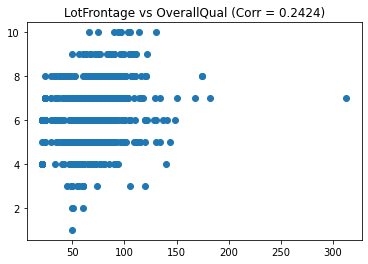

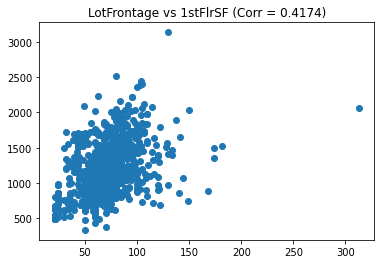

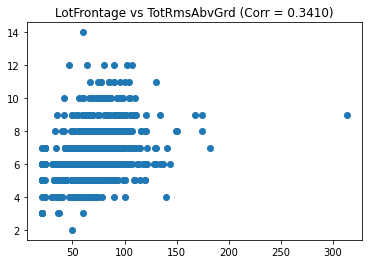

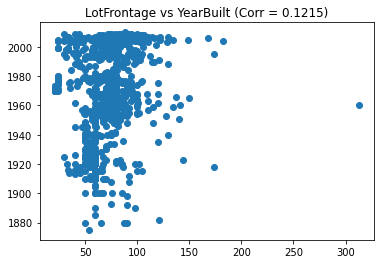

In [8]:
# Ciclo para generar todas las scatter plots de las variables con su correlación
for x in df_training.columns:
    for y in df_training.columns:
        if x != y:
            plt.figure()
            plt.title("{} vs {} (Corr = {:.4f})".format(x,y,correlation[x][y]))
            plt.scatter(df_training[x], df_training[y])

### Modelos de regresión lineal

In [9]:
# Función para el modelo manual
def modelo(x, y, epochs, imprimir_error_cada, lr):
    # Valores iniciales de m y b
    mb = np.array([0,0])
    # Vector que almacenara los errores por cada epoch
    errores = np.array([])
    # Se crea la estructura de datos para almacenar los resultados de las iteraciones, se elige un diccionario
    # con la llave igual al numero de iteracion y el valor es el vector de m y b calculados
    iteraciones = dict()
    # Se realiza la matriz solicitada a partir de x y una columna de 1
    x_1 = np.column_stack((x,np.ones(len(x))))
    # Se realizan las iteraciones indicadas
    for i in range(epochs):
        # Se calcula y_hat
        y_hat = np.dot(x_1, mb)
        # Se calcula el error
        error = np.mean(np.power(y-y_hat, 2))*0.5
        # Se almacena el error en un vector
        errores = np.append(errores, error)
        # Se comprueba si corresponde imprimir el error basado en el numero de iteracion
        if (i+1)%imprimir_error_cada == 0:
            print(error)
        # Se crea un vector llamado y_1 con el valor igual a la diferencia entre y_hat y y
        y_1 = y_hat-y
        # Se calcula los gradientes
        gradientes = np.mean(x_1 * y_1.reshape(len(y_1),1), axis=0)
        # Se actualizan los parametros m y b
        mb = mb - (lr*gradientes)
        # Se almacenan los datos obtenidos de la iteracion
        iteraciones[i+1] = mb
    # Se retorna los valores de las iteraciones en un diccionario y los valores de los errores en un vector
    return iteraciones, errores

In [10]:
# Datos de prueba para entrenar el modelo
x = np.array([65,80,68])
y = np.array([208.5,181.5,223.5])
epochs = 10
imprimir = 10
lr = 0.0001
data, errores = modelo(x,y,epochs,imprimir,lr)

597.0218999895303


In [11]:
# Función para graficar el cambio del error basado en las iteraciones (epochs)
def cambio_error(errores):
    fig, ax = plt.subplots()
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Error")
    ax.set_title("Cambio del error en el tiempo")
    ax.plot(np.arange(1,len(errores)+1),errores, label="Errores calculados")
    ax.legend()

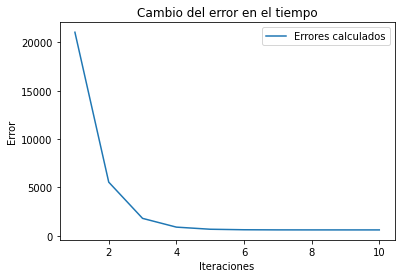

In [12]:
cambio_error(errores)

In [13]:
# Función para visualizar la evolución del modelo 
def evolucion_modelo(data, n, x_training, y_training):
    fig, ax = plt.subplots()
    x = np.arange(1,x_training.max()+1)
    x_1 = np.column_stack((x,np.ones(len(x))))
    ax.scatter(x_training, y_training)
    for i in range(len(data)):
        if (i+1)%n == 0:
            y = np.dot(x_1, data[i])
            ax.plot(x,y, label="Iteracion {}".format(i+1))
    ax.legend()

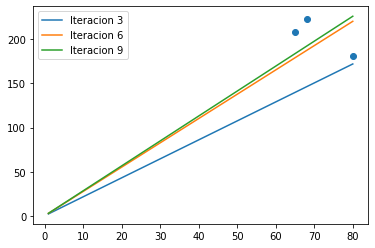

In [14]:
# Evaluación de la función con los datos de prueba
evolucion_modelo(data, 3, x, y)

In [16]:
# Definición de función para modelo sklearn
def modelo_sklearn (x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    reg = LinearRegression().fit(x,y)
    return reg

In [17]:
# Función para calculo de la predicción basado en el modelo manual, modelo sklearn y el promedio de ambos
def prediccion(modelo_manual, modelo_sklearn, x):
    param_modelo_manual = modelo_manual[list(modelo_manual)[-1]]
    x_1 = np.column_stack((x,np.ones(len(x))))
    pred_modelo_manual = np.dot(x_1, param_modelo_manual)
    pred_modelo_sklearn = np.asarray(modelo_sklearn.predict(x.reshape(-1, 1))).reshape(-1)
    pred_prom = np.mean(np.array([pred_modelo_manual, pred_modelo_sklearn]), axis=0 )
    return pred_modelo_manual, pred_modelo_sklearn, pred_prom

### Selección de variables

Para este caso con base en los datos de obtenidos en la sección del análisis exploratorio, se selecciona a como variable independiente a la variable **OverallQual** y como variable dependiente a la variable **SalePrice**. Debido a que tienen un mayor coeficiente de correlación el cual es de ***0.793990***. Asi mismo, tambien se selecciona como segunda variable independiente a **1stFlrSF** ya que tiene un coeficiente de correlación con **SalePrice** de ***0.616289***, a modo de prueba y comparación con la primera variable. Por lo que se procede a entrenar los modelos con estos datos.

1398342860.2789443


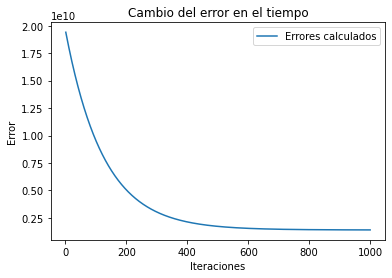

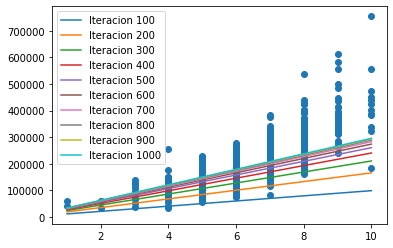

In [72]:
# Entrenamiento de modelo para OverallQual y SalePrice
x1 = df_training['OverallQual'].to_numpy()
y1 = df_training['SalePrice'].to_numpy()
epochs = 1000
imprimir = 1000
lr = 0.0001
data1, errores1 = modelo(x1,y1,epochs,imprimir,lr)
cambio_error(errores1)
evolucion_modelo(data1, 100, x1, y1)

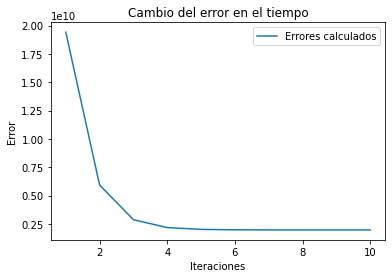

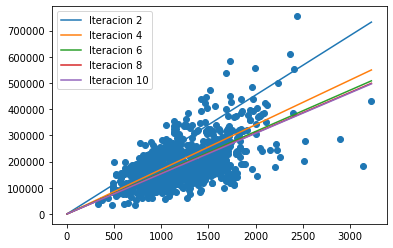

In [78]:
# Entrenamiento de modelo para 1stFlrSF y SalePrice
x2 = df_training['1stFlrSF'].to_numpy()
y2 = df_training['SalePrice'].to_numpy()
epochs = 10
imprimir = 100
lr = 0.000001
data2, errores2 = modelo(x2,y2,epochs,imprimir,lr)
cambio_error(errores2)
evolucion_modelo(data2, 2, x2, y2)

In [80]:
# Prediccion para OverallQual y SalePrice
x1 = df_training['OverallQual'].to_numpy()
y1 = df_training['SalePrice'].to_numpy()
epochs = 1000
imprimir = 10000
lr = 0.0001
data1, errores1 = modelo(x1,y1,epochs,imprimir,lr)
reg1 = modelo_sklearn (x1, y1)

pred_modelo_manual1, pred_modelo_sklearn1, pred_prom1 = prediccion(data1, reg1, df_validation['OverallQual'].to_numpy())

In [81]:
# Prediccion para 1stFlrSF y SalePrice
x2 = df_training['1stFlrSF'].to_numpy()
y2 = df_training['SalePrice'].to_numpy()
epochs = 10
imprimir = 10000
lr = 0.000001
data2, errores2 = modelo(x2,y2,epochs,imprimir,lr)
reg2 = modelo_sklearn (x2, y2)

pred_modelo_manual2, pred_modelo_sklearn2, pred_prom2 = prediccion(data2, reg2, df_validation['1stFlrSF'].to_numpy())

### Cálculo de error de los modelos de regresión lineal

In [82]:
# Definición de la función para calcular el error del modelo manual, modelo sklearn y el promedio de los mismos
def error(pred_modelo_manual, pred_modelo_sklearn, y):
    error_modelo_manual = np.mean(np.power(y_original-pred_modelo_manual, 2))*0.5
    error_modelo_sklearn = np.mean(np.power(y_original-pred_modelo_sklearn, 2))*0.5
    error_modelo_pred_prom = np.mean(np.power(y_original-pred_prom, 2))*0.5
    return error_modelo_manual, error_modelo_sklearn, error_modelo_pred_prom

In [84]:
# Calculo de errores para OverallQual y SalePrice
y_original = df_validation['SalePrice'].to_numpy()
error_modelo_manual1, error_modelo_sklearn1, error_modelo_pred_prom1 = error(pred_modelo_manual1, pred_modelo_sklearn1, y_original)

In [85]:
# Calculo de errores para 1stFlrSF y SalePrice
y_original = df_validation['SalePrice'].to_numpy()
error_modelo_manual2, error_modelo_sklearn2, error_modelo_pred_prom2 = error(pred_modelo_manual2, pred_modelo_sklearn2, y_original)

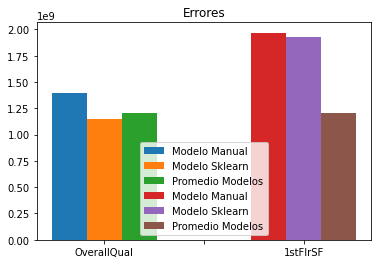

In [92]:
# Grafica del  error por cada modelo para las variables OverallQual y 1stFlrSF
fig, ax = plt.subplots()
N = 3
ind = np.arange(N)
width = 0.35
ax.bar(1, error_modelo_manual1, width, bottom=0, label='Modelo Manual ')
ax.bar(1 + width, error_modelo_sklearn1, width, bottom=0, label='Modelo Sklearn')
ax.bar(1 + 2*width, error_modelo_pred_prom1, width, bottom=0, label='Promedio Modelos')
ax.bar(3, error_modelo_manual2, width, bottom=0, label='Modelo Manual')
ax.bar(3 + width, error_modelo_sklearn2, width, bottom=0, label='Modelo Sklearn')
ax.bar(3 + 2*width, error_modelo_pred_prom2, width, bottom=0, label='Promedio Modelos')
ax.set_title('Errores')
ax.set_xticks(ind + 1 + width)
ax.set_xticklabels(['OverallQual', '', '1stFlrSF'])
ax.legend()
ax.autoscale_view()

### Conclusiones

* Para la variable OverallQual el mejor modelo es el que se entreno utilizando SKLearn. Para la variable de prueba 1stFlrSF, se encontro que el mejor modelo es el promedio de los modelos.
* El modelo manual para OverallQual converge a partir de las 1000 iteraciones con un learning rate de 0.0001. Mientras que para la variable de prueba converge a 10 iteraciones con un learning rate de 0.000001.